In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'skin1.csv')

In [3]:
df.head()

,Unnamed: 0,Disease,Type,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,0,Fungal infection,Skin,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Fungal infection,Skin,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Fungal infection,Skin,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Fungal infection,Skin,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Fungal infection,Skin,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
columns=['Symptom_1', 'Symptom_2', 'Symptom_3',
       'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8',
       'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13',
       'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']

In [5]:
df.isnull().sum()

Unnamed: 0      0
Disease         0
Type            0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4      90
Symptom_5     282
Symptom_6     396
Symptom_7     480
Symptom_8     528
Symptom_9     600
Symptom_10    600
Symptom_11    654
Symptom_12    720
Symptom_13    720
Symptom_14    720
Symptom_15    720
Symptom_16    720
Symptom_17    720
dtype: int64

In [6]:
df=df.drop(columns=['Unnamed: 0', 'Symptom_12', 'Symptom_13',
       'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17'],axis=1)
df.head()

,Disease,Type,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,Fungal infection,Skin,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,Skin,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,Skin,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,Skin,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,Skin,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.fillna("None",inplace=True)

In [8]:
df=df.drop(columns="Type",axis =1)

In [22]:
from sklearn.preprocessing import LabelEncoder
cols= df.columns[1:]
#df1=pd.get_dummies(df, columns = cols , drop_first =True)
#df1

d=df["Disease"]
df1=pd.DataFrame(columns=df.columns, data=LabelEncoder().fit_transform(df.values.flatten()).reshape(df.shape))
df1["Disease"]=d

In [23]:
df.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11'],
      dtype='object')

In [24]:
df.Symptom_3.unique()

array([' nodal_skin_eruptions', ' dischromic _patches', ' fatigue',
       ' weight_loss', ' lethargy', ' blackheads', ' scurring',
       ' skin_peeling', ' silver_like_dusting', ' blister',
       ' red_sore_around_nose'], dtype=object)

In [25]:
x=df1.iloc[:,1:]
y=df1.iloc[:,0]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text yticklabel objects>)

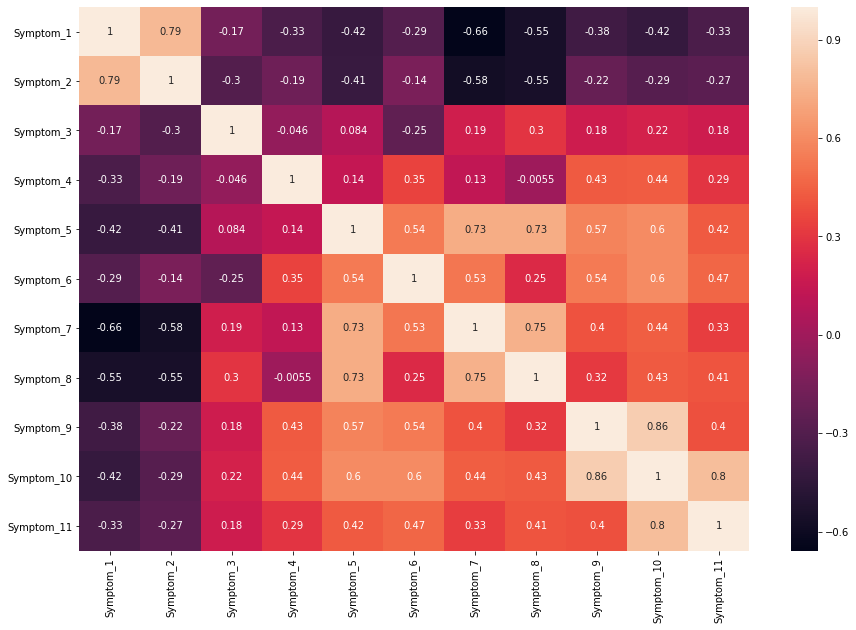

In [26]:
plt.subplots(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)
plt.yticks(rotation=0)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
mod0=LogisticRegression()
mod0.fit(x_train,y_train)
y_pred=mod0.predict(x_test)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [29]:
result_lr=accuracy_score(y_test,y_pred)
result_lr

0.9444444444444444

In [30]:
print(confusion_matrix(y_test,y_pred))

[[29  0  0  3  0  0]
 [ 0 27  0  0  0  0]
 [ 8  0 35  0  0  0]
 [ 1  0  0 40  0  0]
 [ 0  0  0  0 37  0]
 [ 0  0  0  0  0 36]]


In [31]:
b = mod0.predict_proba(x_test)

In [32]:
print(b)

[[1.70623666e-01 6.25712222e-09 3.60586145e-03 8.25333288e-01
  3.46608083e-05 4.02517334e-04]
 [1.98180705e-02 2.62817792e-04 9.66815697e-01 1.28176776e-02
  2.59673384e-07 2.85477639e-04]
 [8.89635485e-01 3.48464230e-09 1.10073198e-01 8.73875485e-09
  5.20914770e-05 2.39212767e-04]
 ...
 [1.15799728e-07 9.98869634e-01 3.20599361e-04 6.34924528e-14
  8.08773483e-04 8.77272378e-07]
 [2.63765352e-03 1.81383271e-07 4.73395703e-06 9.97296048e-01
  1.40566123e-05 4.73260684e-05]
 [2.63765352e-03 1.81383271e-07 4.73395703e-06 9.97296048e-01
  1.40566123e-05 4.73260684e-05]]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'skin1.csv')

In [3]:
df.head()

,Unnamed: 0,Disease,Type,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,0,Fungal infection,Skin,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Fungal infection,Skin,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Fungal infection,Skin,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Fungal infection,Skin,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Fungal infection,Skin,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
columns=['Symptom_1', 'Symptom_2', 'Symptom_3',
       'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8',
       'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13',
       'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']

In [5]:
df.shape

(720, 20)

In [6]:
df.isnull().sum()

Unnamed: 0      0
Disease         0
Type            0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4      90
Symptom_5     282
Symptom_6     396
Symptom_7     480
Symptom_8     528
Symptom_9     600
Symptom_10    600
Symptom_11    654
Symptom_12    720
Symptom_13    720
Symptom_14    720
Symptom_15    720
Symptom_16    720
Symptom_17    720
dtype: int64

In [7]:
df=df.drop(columns=['Unnamed: 0', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17'],axis=1)
df.head()

,Disease,Type,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,Fungal infection,Skin,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,Skin,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,Skin,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,Skin,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,Skin,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.fillna("None",inplace=True)

In [9]:
df=df.drop(columns="Type",axis =1)

In [10]:
df.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11'],
      dtype='object')

In [11]:
cols= df.columns[1:]
#df1=pd.get_dummies(df, columns = cols , drop_first =True)
#df1

from sklearn import preprocessing   
label_encoder = preprocessing.LabelEncoder()

for i in cols:
    df[i]= label_encoder.fit_transform(df[i]) 
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,Fungal infection,5,8,5,0,6,5,4,3,2,2,1
1,Fungal infection,3,5,2,9,6,5,4,3,2,2,1
2,Fungal infection,5,5,2,9,6,5,4,3,2,2,1
3,Fungal infection,5,8,2,9,6,5,4,3,2,2,1
4,Fungal infection,5,8,5,9,6,5,4,3,2,2,1
5,Fungal infection,3,5,2,9,6,5,4,3,2,2,1
6,Fungal infection,5,5,2,9,6,5,4,3,2,2,1
7,Fungal infection,5,8,2,9,6,5,4,3,2,2,1
8,Fungal infection,5,8,5,9,6,5,4,3,2,2,1
9,Fungal infection,5,8,5,0,6,5,4,3,2,2,1


In [12]:
df.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11'],
      dtype='object')

In [13]:
df.Symptom_2.unique()

array([8, 5, 9, 2, 6, 0, 4, 7, 3, 1], dtype=int64)

In [14]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text yticklabel objects>)

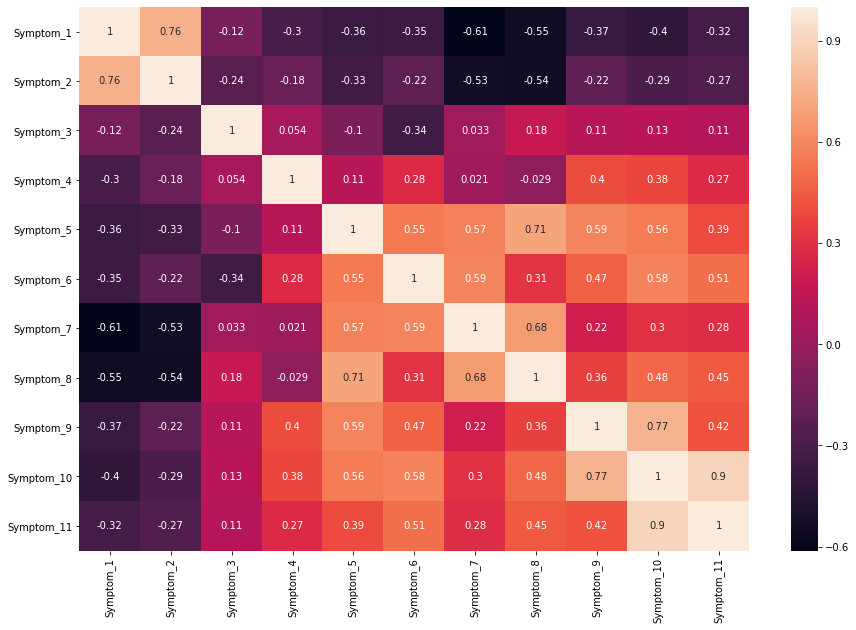

In [15]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.yticks(rotation=0)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
mod0=LogisticRegression()
mod0.fit(x_train,y_train)
y_pred=mod0.predict(x_test)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [18]:
result_lr=accuracy_score(y_test,y_pred)
result_lr

0.9212962962962963

In [19]:
print(confusion_matrix(y_test,y_pred))

[[28  0  0  4  0  0]
 [ 0 27  0  0  0  0]
 [ 8  0 35  0  0  0]
 [ 5  0  0 36  0  0]
 [ 0  0  0  0 37  0]
 [ 0  0  0  0  0 36]]


In [20]:
b = mod0.predict_proba(x_test)

In [21]:
print(b)

[[2.89723232e-01 1.79271749e-08 1.62940606e-01 5.44331239e-01
  2.48901018e-03 5.15895198e-04]
 [4.48704712e-02 5.62748922e-03 9.49123692e-01 2.79122563e-04
  9.89918377e-05 2.33112525e-07]
 [7.40059565e-01 6.66795567e-08 2.44488097e-01 3.25900148e-04
  8.42614428e-03 6.70022728e-03]
 ...
 [2.76573424e-04 8.55281189e-01 1.18573116e-01 4.07906008e-07
  2.46570848e-02 1.21162875e-03]
 [3.31630671e-02 1.55743740e-04 1.09111489e-03 9.65375909e-01
  2.11739812e-04 2.42522723e-06]
 [3.31630671e-02 1.55743740e-04 1.09111489e-03 9.65375909e-01
  2.11739812e-04 2.42522723e-06]]
